In [4]:
pip install matplotlib


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install tensorflow


[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: pip3 install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


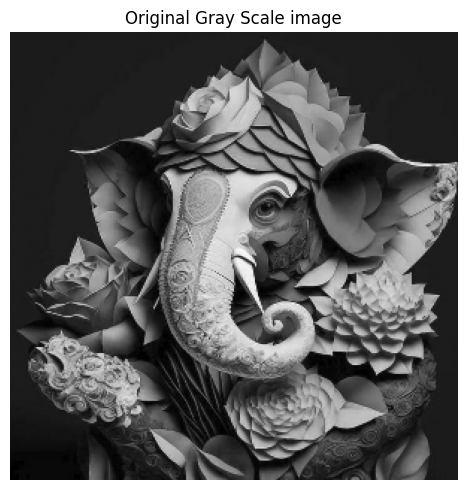

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from itertools import product

# at runtime (rc), make sure plot is not cut off by the figure size
plt.rc('figure', autolayout = True)
plt.rc('image', cmap = 'magma') # setting up colormap

# define our filter/kernel
kernel = tf.constant([[-1,-1,-1], [-1,8,-1], [-1,-1,-1],]) # this is our feature decector

# load our image
image = tf.io.read_file('Ganesh.jpg')
image = tf.image.decode_image(image, channels = 1) # Takes encoded image bytes (PNG, JPEG, GIF, BMP) and converts them into a TensorFlow tensor of pixel values
# channels = 1 means we want to convert the image to grayscale
image = tf.image.resize(image, [300, 300]) # resizing the image to 300x300 pixels

# plot image
img = tf.squeeze(image).numpy() # need to remove 3rd dimension since greyscale expects 2D array
plt.figure(figsize=(5, 5))
plt.imshow(img, cmap='gray')
plt.axis('off')
plt.title('Original Gray Scale image')
plt.show()



In [7]:
# reformatting

image = tf.image.convert_image_dtype(image, dtype=tf.float32) # we must normailize
# for e.g, If the image was: uint8 in [0, 255], it becomes float32 in [0.0, 1.0]

image = tf.expand_dims(image, axis=0)
# add batch dimension, before: (300, 300, 1) after: (1, 300, 300, 1), only 1 image so 1 batch

kernel = tf.reshape(kernel, [*kernel.shape, 1, 1])
# Turns a 2D kernel into a 4D convolution filter.
# reshape kernel to (3, 3, 1, 1) where 3x3 is the size of the kernel, 1 is the number of input channels (grayscale), 
# and 1 is the number of output channels (we want to produce one feature map)

kernel = tf.cast(kernel, dtype=tf.float32)
# we need to make sure the kernel is the same type as the image, so we cast it to float32


In [8]:
# convulation layer

conv_fn = tf.nn.conv2d # slides a filter (kernel) across the image and computes dot products to produce feature maps.

image_filter = conv_fn(
    input=image, # image: (batch, height, width, channels), so in this case (1, 300, 300, 1)
    filters=kernel, # kernel: (filter_height, filter_width, in_channels, out_channels), so in this case (3, 3, 1, 1)
    strides=1,  # how far the kernel moves each step.
    padding='SAME', # Pads the image with zeros at the borders
)

plt.figure(figsize=(15, 5))


<Figure size 1500x500 with 0 Axes>

<Figure size 1500x500 with 0 Axes>

Text(0.5, 1.0, 'Convolution')

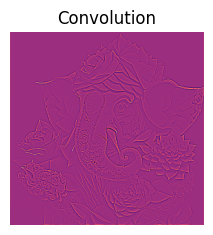

In [ ]:
# Plot the convolved image
plt.subplot(1, 3, 1)

plt.imshow(
    tf.squeeze(image_filter) # remove singleton layer
)
plt.axis('off')
plt.title('Convolution')

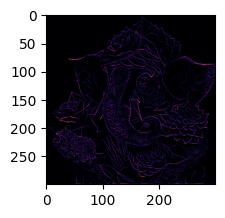

In [10]:
# activation layer, we want to apply non-linear activation function to convuled image, bascially removing negative values from our feature map
relu_fn = tf.nn.relu

# image dectection
image_detect = relu_fn(image_filter)

plt.subplot(1, 3, 2)
plt.imshow(
    # Reformat for plotting
    tf.squeeze(image_detect)
)

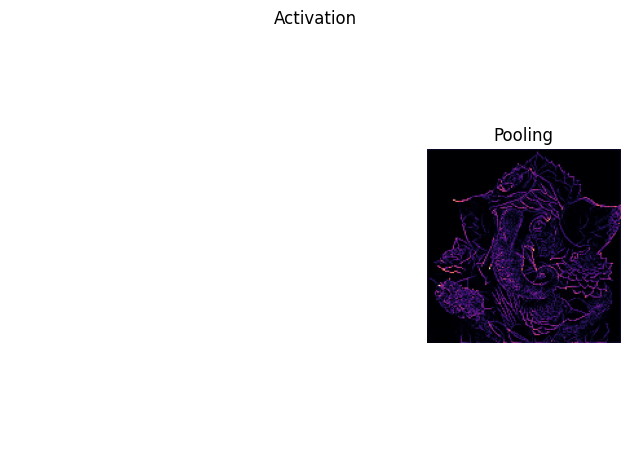

In [12]:
plt.axis('off')
plt.title('Activation')

# Pooling layer
# this is to reduce computation by downsampling the feature map
pool = tf.nn.pool
image_condense = pool(input=image_detect, 
                             window_shape=(2, 2), # Pool over 2×2 regions
                             pooling_type='MAX', # max pool
                             strides=(2, 2), # move 2 pixels at a time
                             padding='SAME',
                            )

plt.subplot(1, 3, 3)
plt.imshow(tf.squeeze(image_condense))
plt.axis('off')
plt.title('Pooling')
plt.show()